In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Body.csv")

In [3]:
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.50
3,1.55,55.84
4,1.57,58.00


In [4]:
df.shape

(31, 2)

In [5]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

In [6]:
df.Height.head()

0    1.47
1    1.50
2    1.52
3    1.55
4    1.57
Name: Height, dtype: float64

In [7]:
df.Weight.head()

0    52.21
1    53.12
2    54.50
3    55.84
4    58.00
Name: Weight, dtype: float64

Text(0.5, 1.0, 'Weight according to body Height')

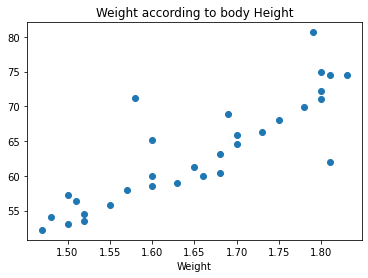

In [8]:
plt.scatter(df.Height, df.Weight)
plt.xlabel("Height")
plt.xlabel("Weight")
plt.title("Weight according to body Height")

In [9]:
df.Height.mean()

1.654516129032258

In [10]:
df.Weight.mean()

63.448387096774205

In [11]:
x = df.drop("Weight", axis=1)

In [12]:
x.head()

,Height
0,1.47
1,1.50
2,1.52
3,1.55
4,1.57


In [13]:
y = df["Weight"]

In [14]:
y.head()

0    52.21
1    53.12
2    54.50
3    55.84
4    58.00
Name: Weight, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.30, random_state=24)

In [17]:
xtrain.shape

(21, 1)

In [18]:
ytrain.shape

(21,)

In [19]:
xtrain.head()

,Height
25,1.58
14,1.83
30,1.81
9,1.70
7,1.65


In [20]:
ytrain.head()

25    71.20
14    74.46
30    74.50
9     64.50
7     61.29
Name: Weight, dtype: float64

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
reg = LinearRegression()

In [23]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [24]:
reg.coef_

array([52.2920995])

In [25]:
reg.intercept_

-23.455929130162723

In [26]:
reg.predict([[1.85]])

array([73.28445494])

In [27]:
#y = mx + C
out = (52.2920995*1.85) + (-23.455929130162723)

In [28]:
out

73.28445494483728

In [29]:
xtest

,Height
10,1.73
12,1.78
24,1.69
8,1.68
6,1.63
28,1.79
21,1.60
5,1.60
20,1.50
13,1.80


In [30]:
# y = 52.2920995* xtest + (-23.455929130162723)
pred = reg.predict(xtest)   #y = predicted value

In [31]:
pred

array([67.009403  , 69.62400798, 64.91771902, 64.39479803, 61.78019305,
       70.14692897, 60.21143007, 60.21143007, 54.98222012, 70.66984997])

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
mean_squared_error(ytest,pred)

14.65948372062742

Text(0.5, 1.0, 'Weight according to body Height')

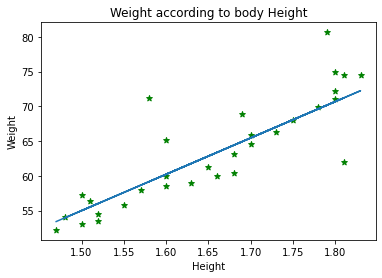

In [39]:
plt.plot(df.Height, reg.predict(x))
plt.scatter(df["Height"], df.Weight, marker='*',color='green')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Weight according to body Height")

In [40]:
reg.score(xtest,ytest)

0.7064438265760554